# Coffee: the world's drug of choice

- Does one region (country) produce better coffee?
- Does altitude have any impact on coffee quality (total cup score, or any attribute)?
- 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasgui import show
from math import pi
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import dataframe_image as dfi

In [5]:
# initialize source dataset
arabica_src_data = pd.read_csv('coffee-quality-database/data/arabica_data_cleaned.csv')

# drop unnecessary columns
df = arabica_src_data.drop(['Unnamed: 0','Owner', 'Farm.Name', 'Mill', 'ICO.Number', 'Company', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
                    'Grading.Date', 'Owner.1', 'Certification.Body', 'Certification.Address', 'Certification.Contact',
                     'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters'], axis=1)

# drop row with '0' cupping points
df.drop(index=1310, axis=0, inplace=True)

In [6]:
arabica_src_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [8]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

In [7]:
# mean total cup points grouped by country in descending order
df[['Country.of.Origin', 'Total.Cup.Points']].groupby('Country.of.Origin').mean('Total.Cup.Points')\
.sort_values('Total.Cup.Points', ascending=False)

,Total.Cup.Points
Country.of.Origin,
United States,85.978750
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
Kenya,84.309600
Uganda,84.051923
Ecuador,83.830000
Panama,83.707500
Colombia,83.106557


In [8]:
# number of coffees sampled grouped by country
df.groupby('Country.of.Origin').count()[['Total.Cup.Points']].sort_values('Total.Cup.Points', ascending=False).reset_index()

,Country.of.Origin,Total.Cup.Points
0,Mexico,236
1,Colombia,183
2,Guatemala,181
3,Brazil,132
4,Taiwan,75
5,United States (Hawaii),73
6,Honduras,52
7,Costa Rica,51
8,Ethiopia,44
9,"Tanzania, United Republic Of",40


In [10]:
# creating mask to filter countries with only coffee samples > 40 (top 9)
coffee_by_region = df.groupby('Country.of.Origin').count()[['Total.Cup.Points']].sort_values('Total.Cup.Points', ascending=False).reset_index()
over_40 = coffee_by_region[coffee_by_region['Total.Cup.Points'] > 40]
list_of_over_40 = over_40['Country.of.Origin'].tolist()

In [11]:
# initialize new df using mask, top 9 countries of coffees sampled
top_9 = df[df['Country.of.Origin'].isin(list(over_40['Country.of.Origin'].values))]


In [12]:
top_9.groupby('Country.of.Origin').mean().sort_values('Total.Cup.Points', ascending=False)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
Country.of.Origin,,,,,,,,,,,,,,,,
Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,8.048636,85.484091,0.082955,0.250000,0.363636,5.159091,1800.300667
Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,7.620546,83.106557,0.062022,0.377049,0.208791,1.939891,1585.640000
Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,7.663529,82.789020,0.083333,0.352941,0.117647,2.823529,1380.134783
Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,7.562955,82.405909,0.082348,0.128788,0.446970,3.598485,1016.771429
Taiwan,7.533600,7.463600,7.395467,7.415467,7.450000,7.426000,9.893067,9.982133,9.964400,7.476667,82.001333,0.081067,0.453333,0.066667,0.333333,729.271429
Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,7.391105,81.846575,0.102265,0.187845,0.276243,3.419890,3860.261492
United States (Hawaii),7.572466,7.576438,7.502740,7.615479,7.625753,7.644110,9.478904,9.561507,9.652466,7.588767,81.820411,0.057260,1.383562,0.000000,3.547945,518.160000
Mexico,7.457585,7.379025,7.228051,7.428347,7.380466,7.328686,9.744068,9.658136,9.971780,7.314703,80.890085,0.113602,0.843220,0.038136,6.779661,1235.362069
Honduras,7.432692,7.373269,7.197308,7.372692,7.378462,7.301731,9.833269,9.820577,9.846154,7.327885,80.883654,0.107500,0.057692,0.192308,3.596154,1425.920000


In [86]:
# mask_over_40 = df['Country.of.Origin'].apply(lambda country: country in list_of_over_40)
# top_9 = df[mask_over_40]
# top_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1309
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1027 non-null   object 
 1   Country.of.Origin     1027 non-null   object 
 2   Lot.Number            197 non-null    object 
 3   Altitude              844 non-null    object 
 4   Region                993 non-null    object 
 5   Producer              836 non-null    object 
 6   Harvest.Year          993 non-null    object 
 7   Variety               883 non-null    object 
 8   Processing.Method     910 non-null    object 
 9   Aroma                 1027 non-null   float64
 10  Flavor                1027 non-null   float64
 11  Aftertaste            1027 non-null   float64
 12  Acidity               1027 non-null   float64
 13  Body                  1027 non-null   float64
 14  Balance               1027 non-null   float64
 15  Uniformity           

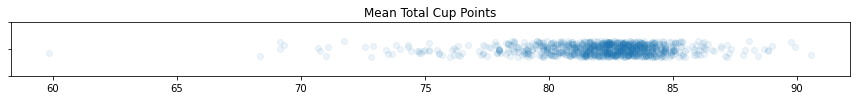

In [40]:
fig, ax = plt.subplots(figsize=(12, 1.5), tight_layout=True)
one_dim_scatterplot(top_9['Total.Cup.Points'], ax, jitter=0.3, alpha=0.08)
ax.set_title('Mean Total Cup Points');
fig.savefig('images/mean_scatter')

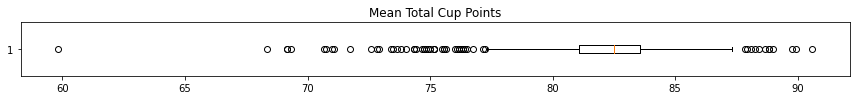

In [41]:
mean = top_9['Total.Cup.Points']
fig, ax = plt.subplots(figsize=(12,1.5), tight_layout=True)
ax.boxplot(mean, vert=False)
ax.set_title('Mean Total Cup Points');
fig.savefig('images/mean_box')

In [14]:
mean.describe()

count    1027.000000
mean       82.086514
std         2.691199
min        59.830000
25%        81.080000
50%        82.500000
75%        83.580000
max        90.580000
Name: Total.Cup.Points, dtype: float64

In [15]:
# df of cupping score results of top 9 countries
scored = top_9[['Country.of.Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points']]\
                .groupby('Country.of.Origin').mean().sort_values('Total.Cup.Points', ascending=False)
scored

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
Country.of.Origin,,,,,,,,,,,
Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,8.048636,85.484091
Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,7.620546,83.106557
Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,7.663529,82.789020
Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,7.562955,82.405909
Taiwan,7.533600,7.463600,7.395467,7.415467,7.450000,7.426000,9.893067,9.982133,9.964400,7.476667,82.001333
Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,7.391105,81.846575
United States (Hawaii),7.572466,7.576438,7.502740,7.615479,7.625753,7.644110,9.478904,9.561507,9.652466,7.588767,81.820411
Mexico,7.457585,7.379025,7.228051,7.428347,7.380466,7.328686,9.744068,9.658136,9.971780,7.314703,80.890085
Honduras,7.432692,7.373269,7.197308,7.372692,7.378462,7.301731,9.833269,9.820577,9.846154,7.327885,80.883654


In [46]:
scored.dfi.export('images/scored.png')

In [16]:
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Ethiopia'].tolist()

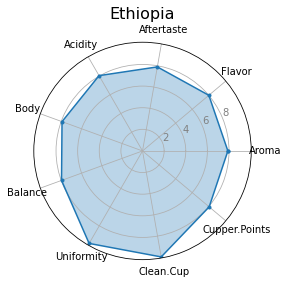

In [27]:
categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Cupper.Points']
N = len(categories)

values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Cupper.Points']].loc['Ethiopia'].tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values, marker='.')
plt.fill(angles, values, alpha=0.3)

plt.xticks(angles[:-1], categories)
plt.yticks([2,4,6,8], color='grey', size=10)

plt.title('Ethiopia', size=16);

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



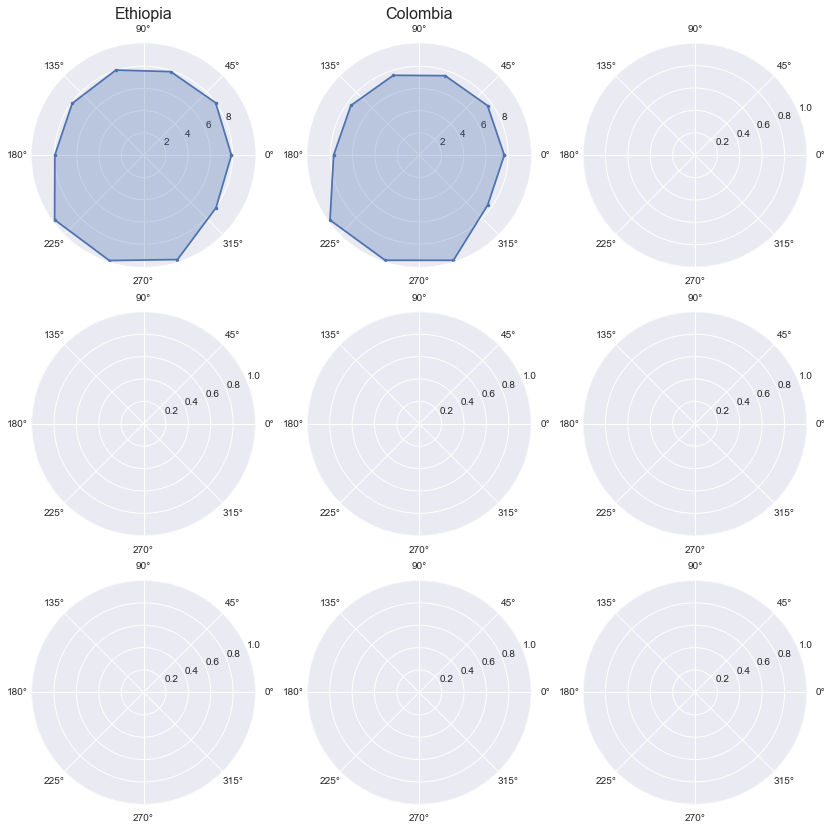

In [163]:
fig, ax = plt.subplots(3,3,figsize=(14,14),subplot_kw=dict(projection='polar'))
plt.style.use('seaborn')

# graph constants
# x axis
categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']
N = len(categories)
# creating connecting 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 'ethiopia plot'
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Ethiopia'].tolist()
values += values[:1]

ax[0,0].plot(angles, values, marker='.')
ax[0,0].fill(angles, values, alpha=0.3)
ax[0,0].set_xticks(angles[:-1], categories)
ax[0,0].set_yticks([2,4,6,8])
ax[0,0].set_title('Ethiopia', size=16);

# columbia plot
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Colombia'].tolist()
values += values[:1]

ax[0,1].plot(angles, values, marker='.')
ax[0,1].fill(angles, values, alpha=0.3)
ax[0,1].set_xtick(angles[:-1], categories)
ax[0,1].set_yticks([2,4,6,8])
ax[0,1].set_title('Colombia', size=16);

In [18]:
# function to plot radar charts of coffee cupping scores
def plot_scored(region, color):
    categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    for i, axes in enumerate(axes.flat):
    for i in scored['Country.of.Origin'].tolist():
        values = []
            for j in scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['{}'.format(i)].tolist():
                values.append(i)
        ax.polar(angles, values, marker='.')
        ax.set_title('{}'.format(i))

IndentationError: expected an indented block (<ipython-input-18-bc40a5a4c9b7>, line 10)

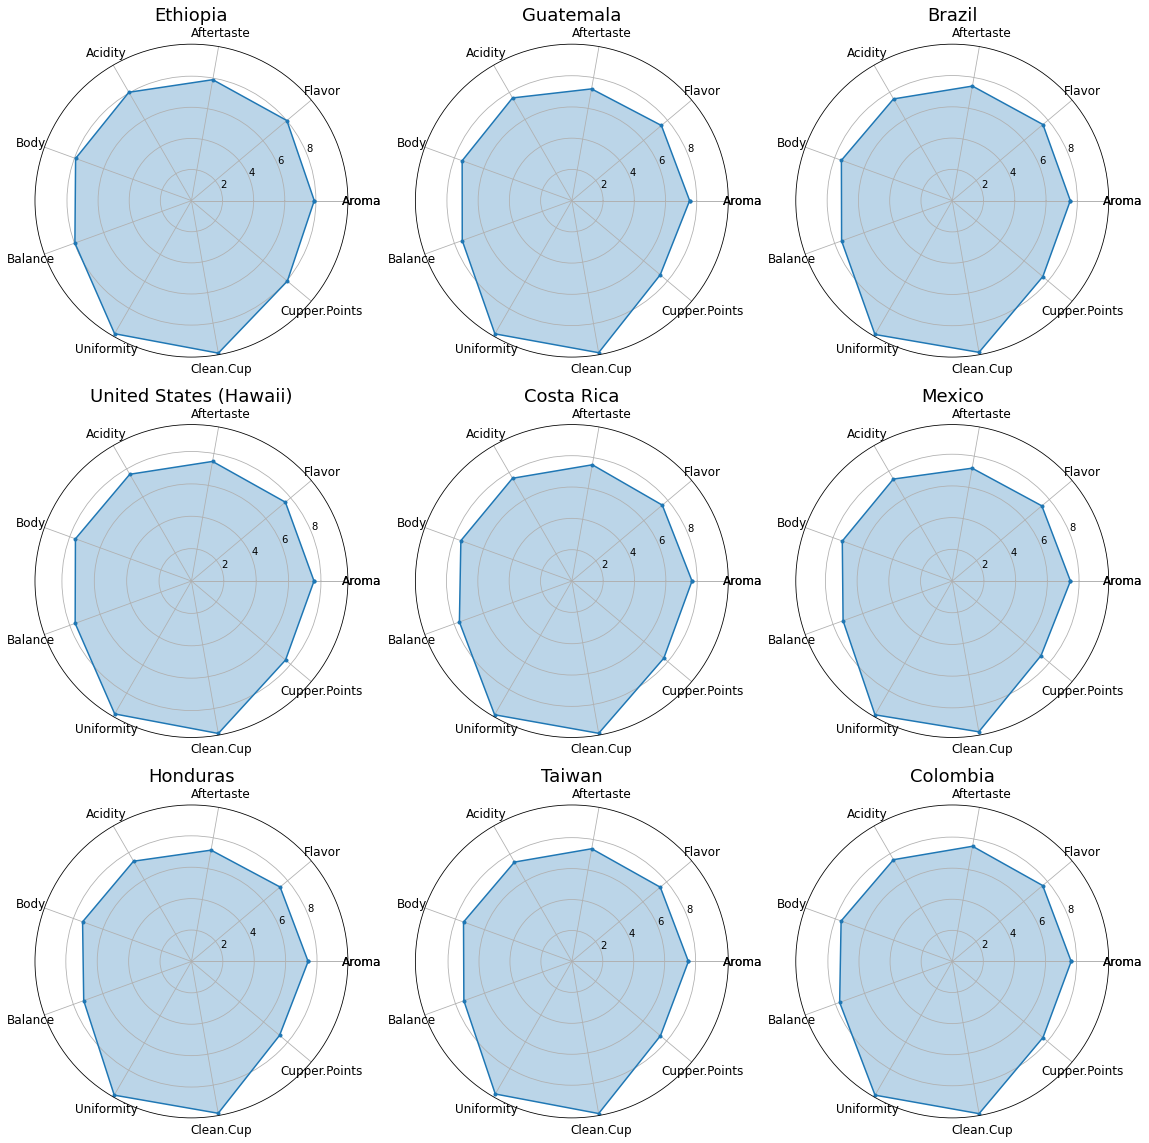

In [32]:
def get_values(country):
    values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Cupper.Points']].loc[country].tolist()
    values += values[:1]
    return values

def helper(ax, country):
    categories = [' ', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Cupper.Points', 'Aroma']
    N = 9
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
#     for i in scored['Country.of.Origin'].tolist():
    ax.plot(angles, get_values(country), marker='.', )
    ax.fill(angles, get_values(country), alpha=0.3)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticks([2,4,6,8])
    ax.set_title(country, size=18);
    
    
# and use it like so
# fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
# helper(ax, 'Ethiopia')
# plt.show() 


# just so there is no code output showing after the cell
# and if you have multiple series of values, turn it into a loop
# break it down into a simple problem. write functions to do simple things, 
# and then put the simple pieces together to do something more complicated
# or make multiple plots in one figure
# array where rows are one set of values
# arr_values = [values1, values2, etc...]
countries = ['Ethiopia', 'Guatemala', 'Brazil', 'United States (Hawaii)',
       'Costa Rica', 'Mexico', 'Honduras', 'Taiwan', 'Colombia']
fig, axs = plt.subplots(3, 3, figsize=(16,16), subplot_kw=dict(projection='polar')) # 4 rows and 5 columns of subplots
for (ax, country) in zip(axs.flat, countries):
    helper(ax, country);
#     # will fill up your subplots one by one
plt.tight_layout()
fig.savefig('images/radar')

In [18]:
import plotly.express as px

In [19]:
scored

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
Country.of.Origin,,,,,,,,,,,
Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,8.048636,85.484091
Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,7.620546,83.106557
Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,7.663529,82.789020
Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,7.562955,82.405909
Taiwan,7.533600,7.463600,7.395467,7.415467,7.450000,7.426000,9.893067,9.982133,9.964400,7.476667,82.001333
Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,7.391105,81.846575
United States (Hawaii),7.572466,7.576438,7.502740,7.615479,7.625753,7.644110,9.478904,9.561507,9.652466,7.588767,81.820411
Mexico,7.457585,7.379025,7.228051,7.428347,7.380466,7.328686,9.744068,9.658136,9.971780,7.314703,80.890085
Honduras,7.432692,7.373269,7.197308,7.372692,7.378462,7.301731,9.833269,9.820577,9.846154,7.327885,80.883654


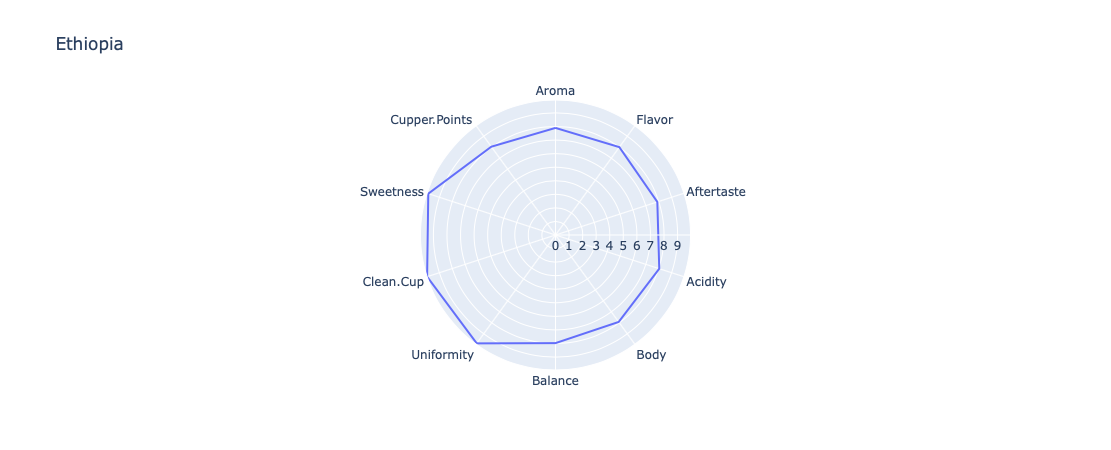

In [121]:
fig = px.line_polar(r=values, theta=categories, line_close=True, title='Ethiopia')
fig.show()

# EDA for moisture, defects, altitude, and country vs cup points

In [49]:
altitudes = df[['Country.of.Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters']]

In [50]:
# drop rows with null values for altitude_mean_meters
altitudes_corrected = altitudes.dropna()

In [51]:
# drop outliers/wrong data points
altitudes_corrected = altitudes_corrected[altitudes_corrected['altitude_mean_meters'] < 10000].sort_values('altitude_mean_meters', ascending=False)

In [52]:
altitudes_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 1098 to 279
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1079 non-null   object 
 1   Aroma                 1079 non-null   float64
 2   Flavor                1079 non-null   float64
 3   Aftertaste            1079 non-null   float64
 4   Acidity               1079 non-null   float64
 5   Body                  1079 non-null   float64
 6   Balance               1079 non-null   float64
 7   Uniformity            1079 non-null   float64
 8   Clean.Cup             1079 non-null   float64
 9   Sweetness             1079 non-null   float64
 10  Cupper.Points         1079 non-null   float64
 11  Total.Cup.Points      1079 non-null   float64
 12  altitude_mean_meters  1079 non-null   float64
dtypes: float64(12), object(1)
memory usage: 118.0+ KB


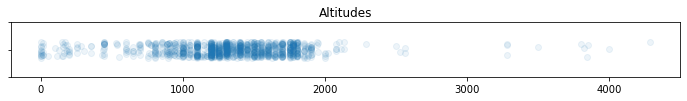

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(altitudes_corrected['altitude_mean_meters'], ax, jitter=0.3, alpha=0.08)
ax.set_title('Altitudes');

<AxesSubplot:>

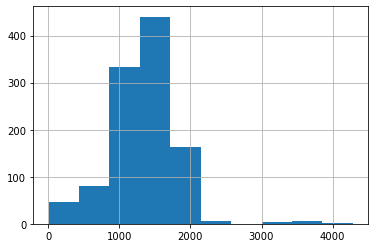

In [25]:
altitudes_corrected['altitude_mean_meters'].hist()

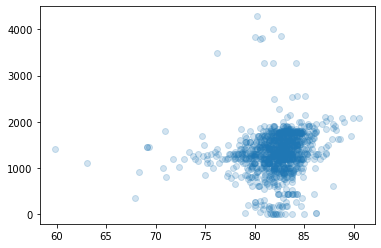

In [77]:
fig, ax = plt.subplots()
ax.scatter(y=altitudes_corrected['altitude_mean_meters'], x=altitudes_corrected['Total.Cup.Points'], alpha=.2)
# ax[1].hist(y=altitudes_corrected['altitude_mean_meters'], x=altitudes_corrected['Total.Cup.Points'], alpha=.2)

<AxesSubplot:xlabel='altitude_mean_meters', ylabel='Count'>

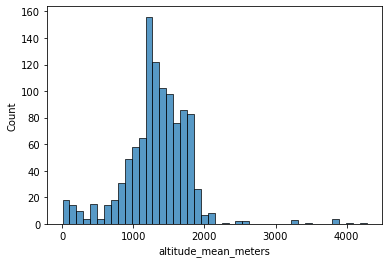

In [86]:
sns.histplot(altitudes_corrected['altitude_mean_meters'])

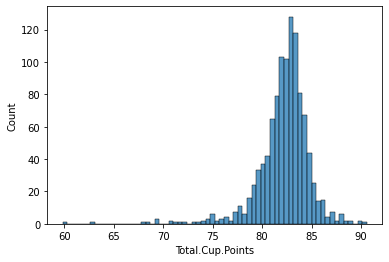

In [60]:
sns.histplot(altitudes_corrected['Total.Cup.Points'])
plt.savefig('images/total_cup_points.png')

In [88]:
countries = top_9['Country.of.Origin'].unique().tolist()

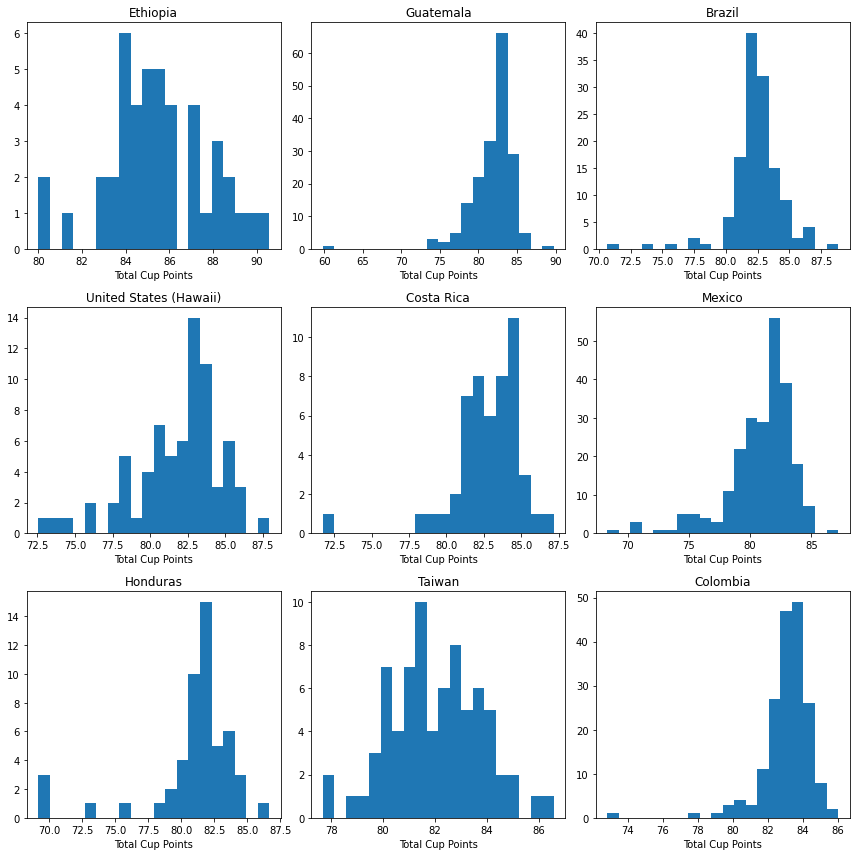

In [64]:
def plot_cup_points(ax, country):
    new_df = df[df['Country.of.Origin'] == country]
    ax.hist(new_df['Total.Cup.Points'], bins=20)
    ax.set_title(country)
    ax.set_xlabel('Total Cup Points')

countries = ['Ethiopia', 'Guatemala', 'Brazil', 'United States (Hawaii)',
       'Costa Rica', 'Mexico', 'Honduras', 'Taiwan', 'Colombia']
fig, axs = plt.subplots(3,3, figsize=(12,12)) # 4 rows and 5 columns of subplots
for (ax, country) in zip(axs.flat, countries):
    plot_cup_points(ax, country);
#     # will fill up your subplots one by one
plt.tight_layout()
plt.savefig('images/country_points.png')

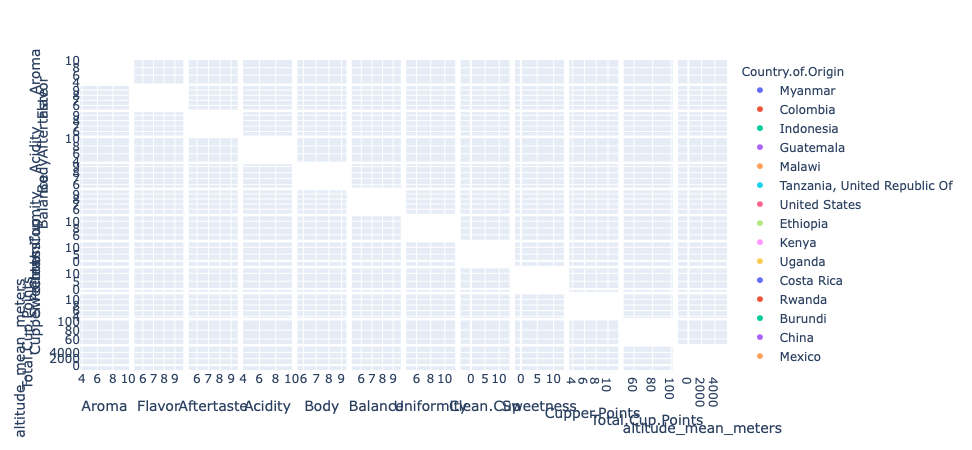

In [218]:
fig = px.scatter_matrix(data_frame=altitudes_corrected,
                       dimensions=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                                   'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters'], color='Country.of.Origin')
fig.update_traces(diagonal_visible=False)
fig.show()

In [27]:
from plotly.subplots import make_subplots

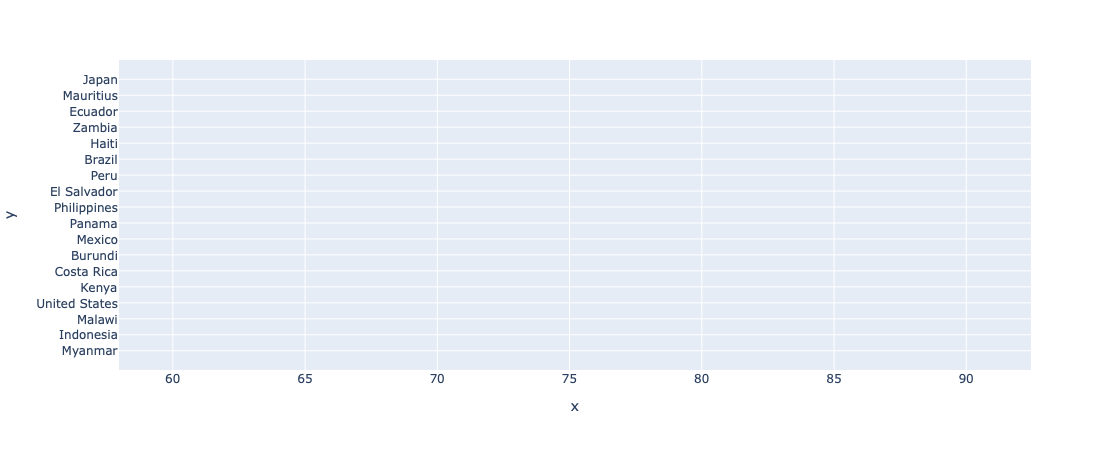

In [87]:
fig = px.scatter(y=altitudes_corrected['Country.of.Origin'], x=altitudes_corrected['Total.Cup.Points'], opacity=.2)
fig.show()

In [37]:
df['total_defects'] = df['Category.One.Defects'] + df['Category.Two.Defects']

In [42]:
defects = df[['Country.of.Origin','Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 
             'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'total_defects']]

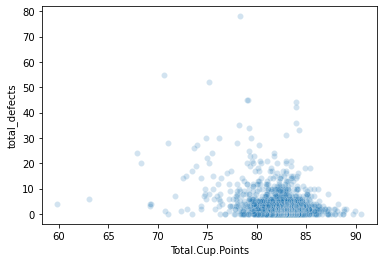

In [79]:
sns.scatterplot(y=defects['total_defects'], x=defects['Total.Cup.Points'], alpha=.2);

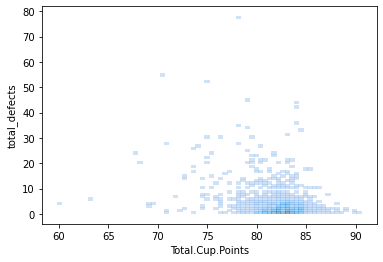

In [78]:
sns.histplot(y=defects['total_defects'], x=defects['Total.Cup.Points'], alpha=.5);

In [65]:
country_points = top_9[['Country.of.Origin', 'Total.Cup.Points']].dropna()

In [66]:
country_points.rename(columns = {'Country.of.Origin': 'Country', 'Total.Cup.Points': 'cup_points'}, inplace=True)

In [67]:
mod = smf.ols(formula='cup_points ~ Country', data=country_points)
res = mod.fit()

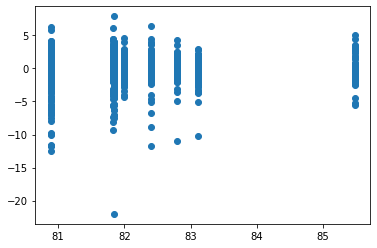

In [68]:
plt.scatter(res.fittedvalues, res.resid)
plt.savefig('images/residuals.png')

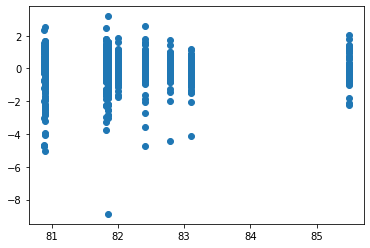

In [143]:
plt.scatter(res.fittedvalues, res.resid_pearson)

In [128]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'het_sc

In [144]:
unique = country_points['Country'].unique()

In [145]:
unique.sort()
unique

array(['Brazil', 'Colombia', 'Costa Rica', 'Ethiopia', 'Guatemala',
       'Honduras', 'Mexico', 'Taiwan', 'United States (Hawaii)'],
      dtype=object)

In [146]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             cup_points   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     23.69
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.63e-33
Time:                        16:21:33   Log-Likelihood:                -2385.8
No. Observations:                1027   AIC:                             4790.
Df Residuals:                    1018   BIC:                             4834.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:
# anova

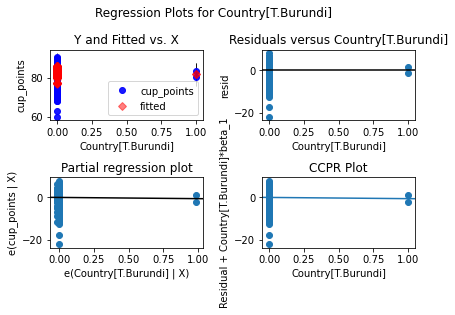

In [126]:
fig = sm.graphics.plot_regress_exog(res, "Country[T.Burundi]")
fig.tight_layout(pad=1.0)

In [70]:
multi = sm.stats.multicomp.MultiComparison(country_points['cup_points'], country_points['Country'])

In [71]:
comp = multi.tukeyhsd()

In [72]:
comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Brazil,Colombia,0.7006,0.2461,-0.1799,1.5812,False
Brazil,Costa Rica,0.3831,0.9,-0.8883,1.6545,False
Brazil,Ethiopia,3.0782,0.001,1.7358,4.4205,True
Brazil,Guatemala,-0.5593,0.5556,-1.4419,0.3233,False
Brazil,Honduras,-1.5223,0.0059,-2.7848,-0.2597,True
Brazil,Mexico,-1.5158,0.001,-2.3539,-0.6777,True
Brazil,Taiwan,-0.4046,0.9,-1.5196,0.7105,False
Brazil,United States (Hawaii),-0.5855,0.7685,-1.7102,0.5392,False
Colombia,Costa Rica,-0.3175,0.9,-1.5385,0.9035,False
Colombia,Ethiopia,2.3775,0.001,1.0828,3.6723,True


| Mean Points | Country     |   |   |   |   |   |   |
|-------------|-------------|---|---|---|---|---|---|
| 85.28       | Ethiopia    | A |   |   |   |   |   |
| 82.79       | Costa Rica  | A | B | C |   |   |   |
| 83.11       | Columbia    |   | B | C |   |   |   |
| 82.41       | Brazil      |   |   | C |   |   |   |
| 80.88       | Hounduras   | A |   | C | D |   |   |
| 80.89       | Mexico      | A |   | C | D | E | F |
| 81.45       | Guatemala   |   |   |   | D | E |   |
| 82.00       | Taiwan      |   |   |   | D |   | F |
| 81.82       | US (Hawaii) |   |   |   | D |   |   |

In [75]:
test = pd.DataFrame(comp.summary())

In [77]:
test.dfi.export('images/groupcomp.png')